# Polynomial Regression Notebook
-------------------------------------------
#### Dataset is poly-data.csv
This dataset contains 10 values for different job positions, their level, and their salaries.
We want to build a model that predicts the salary given the level.

## Part One: From scratch
In the first part of the notebook, we will implement Polynomial Regression **from scratch** using **Gradient Descent** algorithm which we took in session ML1.

In [2]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read dataset
data = pd.read_csv('Data/poly-data.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# As shown, X, which is the level number, is at column 1
X = data.iloc[:,1]
# And Y, which is the salary, is at column 2
Y = data.iloc[:,2]

print('X is:\n', X,'\n\n')
print('Y is:\n', Y)

X is:
 0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64 


Y is:
 0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


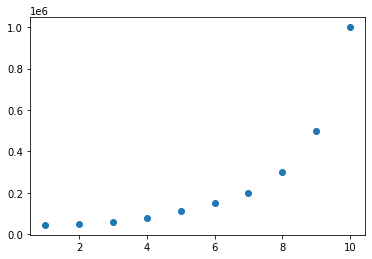

In [5]:
plt.scatter(X, Y)
plt.show()

We will show a linear model on the data first to show how it would be such a bad fit for the data, and hence we need to move to a higher degree.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X_reshaped = X.to_numpy().reshape(len(X), 1)
print(X_reshaped.shape)
lin_reg_model = LinearRegression()
lin_reg_model = lin_reg_model.fit(X_reshaped, Y)
Ypred = lin_reg_model.predict(X_reshaped)

(10, 1)


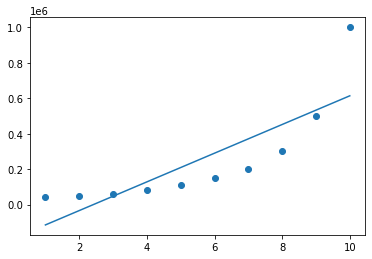

In [8]:
# graphing
plt.scatter(X, Y)
plt.plot(X, Ypred)
plt.show()

We can obviously see that the linear model don't fit the data at all.

Now, we will build the polynomial model using the same Gradient Descent we used in the Linear Regression Notebook.

The only difference here, we now have the model as Y = a0 + a1 * X + a2 * X^2.

Hence, we have 3 paramters we need to evaluate; a0, a1 and a2.
And hence, we will calculate 3 gradients, D0, D1 and D2.

In [10]:
# Y = a0 + a1 * X + a2 * X^2
a0, a1, a2 = 0, 0, 0
lr = 0.0001
epochs = 1000
n = float(len(X))
for i in range(epochs):
    Ypred = a0 + a1 * X + a2 * X**2
    # MSE = 1/n * summation((y-(a0 + a1 * X + a2 * X^2))^2)
    D0 = (-2/n) * np.sum(Y - Ypred)
    D1 = (-2/n) * np.sum(X * (Y - Ypred))
    D2 = (-2/n) * np.sum(X**2 * (Y - Ypred))
    a0 = a0 - lr * D0
    a1 = a1 - lr * D1
    a2 = a2 - lr * D2

In [11]:
print('Function is Y = %.2f * X^2 + %.2f * X + %.2f' % (a2, a1, a0))

Function is Y = 9043.68 * X^2 + -15976.77 * X + -2954.75


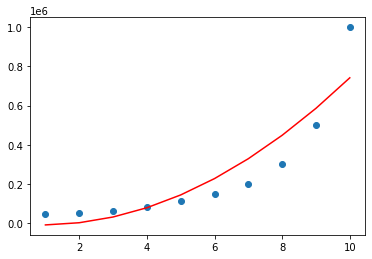

In [12]:
plt.scatter(X, Y)
plt.plot(X, Ypred, color='red')
plt.show()

## Part Two: Using Numpy

In this part, we will use [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and [poly1d](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions from Numpy.

Polyfit takes input data, and the degree of the polynomial model you want to build, and returns the parameters of the polynomial function. In this example, it will be a0, a1 and a2 values.

Poly1d takes input the paramters of the polynomial, and builds the polynomial model accordingly.

In [13]:
params = np.polyfit(X, Y, 2)
# model is y = params[0] * X^2 + params[1] * X + params[2]
numpy_model = np.poly1d(params)
print('Function is:\n\n', np.poly1d(numpy_model), '\n')

Function is:

            2
1.943e+04 x - 1.329e+05 x + 2.322e+05 



[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function in Numpy returns an array of size *num* starting from *start* to *stop*.

We will use it to make an array of values for X axis to graph the Numpy model.

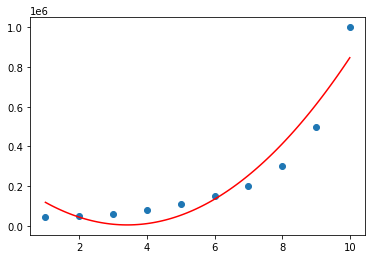

In [14]:
X_range = np.linspace(min(X), max(X), 100)
Ypred = numpy_model(X_range)
plt.scatter(X, Y)
plt.plot(X_range, Ypred, color='red')
plt.show()

## Part Three: Using Sklearn

We will use [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.get_params) and [PolynomialFeatures](scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

PolynomialFeatures takes the degree of the polynomial model you want to build and returns this model.

The model is then fit on the X data only to return a matrix of shape (len(X), degree+1).

Each row i in this matrix = X[i]^0, X[i]^1, ..., X[i]^degree

..

In our case here for a 2nd degree, the matrix will have three columns.

First column X^0 is always 1.

Second column X^1 is same as X.

Third column is X^2.

This matrix is then used as input to LinearRegression.fit function, so that instead of building a linear model on all data, it builds a linear model between each two values of X. Given enough data, the final curve or function is smooth-enough and accurate enough as the polynomial model.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [16]:
poly_reg_features = PolynomialFeatures(degree=2)
X_poly = poly_reg_features.fit_transform(X_reshaped)
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [17]:
pol_reg_model = LinearRegression()
# notice we are fitting it on poly X and not X
pol_reg_model.fit(X_poly, Y)
Ypred = pol_reg_model.predict(X_poly)

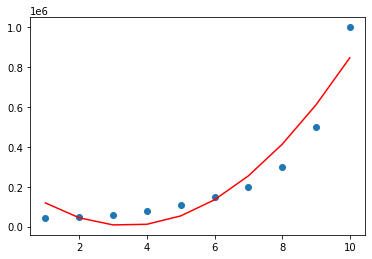

In [18]:
plt.scatter(X, Y)
plt.plot(X, Ypred, color='red')
plt.show()